In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/electric-vehicle-population-data/Electric_Vehicle_Population_Data (1).csv


**> **#Loaded the all library*** 

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install plotly
import plotly.express as px

# LOAD THE DATA

In [3]:
df = pd.read_csv("/kaggle/input/electric-vehicle-population-data/Electric_Vehicle_Population_Data (1).csv")
df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EBXK,King,Seattle,WA,98178.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,37.0,477309682,POINT (-122.23825 47.49461),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,5YJYGDEE3L,Kitsap,Poulsbo,WA,98370.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,23.0,109705683,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,KM8KRDAF5P,Kitsap,Olalla,WA,98359.0,2023,HYUNDAI,IONIQ 5,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,26.0,230390492,POINT (-122.54729 47.42602),PUGET SOUND ENERGY INC,5.303509e+10
3,5UXTA6C0XM,Kitsap,Seabeck,WA,98380.0,2021,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30.0,0.0,35.0,267929112,POINT (-122.81585 47.64509),PUGET SOUND ENERGY INC,5.303509e+10
4,JTMAB3FV7P,Thurston,Rainier,WA,98576.0,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,2.0,236505139,POINT (-122.68993 46.88897),PUGET SOUND ENERGY INC,5.306701e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235687,1C4RJXN62R,Pierce,Tacoma,WA,98407.0,2024,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,27.0,267004272,POINT (-122.51134 47.29238),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10
235688,5YJSA1E28J,Snohomish,Stanwood,WA,98292.0,2018,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,249.0,0.0,10.0,198794410,POINT (-122.37265 48.24159),BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOH...,5.306105e+10
235689,3FA6P0SU2F,King,Redmond,WA,98052.0,2015,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19.0,0.0,48.0,261742288,POINT (-122.13158 47.67858),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
235690,WA1BCBFZ6P,Snohomish,Lake Stevens,WA,98258.0,2023,AUDI,Q4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,44.0,253474854,POINT (-122.06402 48.01497),PUGET SOUND ENERGY INC,5.306105e+10


In [4]:
#data cleaning + filtering
df['Electric Vehicle Type'] = df['Electric Vehicle Type'].astype(str).str.strip()
ev_df = df[df['Electric Vehicle Type'].isin(['BEV', 'PHEV'])].copy()
print(ev_df.shape)
ev_df['Electric Vehicle Type'].value_counts()
df.columns = df.columns.str.strip()  

(0, 17)


In [5]:
#checking VIN duplicate 
df['VIN (1-10)'].duplicated().any()

True

In [6]:
# Im removing leading/trailing spaces and standardize case
df['VIN (1-10)'] = df['VIN (1-10)'].str.strip().str.upper()

# This one is for filter the duplicates again
duplicate_vins = df[df['VIN (1-10)'].duplicated(keep=False)]
duplicate_vins

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EBXK,King,Seattle,WA,98178.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,37.0,477309682,POINT (-122.23825 47.49461),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,5YJYGDEE3L,Kitsap,Poulsbo,WA,98370.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,23.0,109705683,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,KM8KRDAF5P,Kitsap,Olalla,WA,98359.0,2023,HYUNDAI,IONIQ 5,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,26.0,230390492,POINT (-122.54729 47.42602),PUGET SOUND ENERGY INC,5.303509e+10
3,5UXTA6C0XM,Kitsap,Seabeck,WA,98380.0,2021,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30.0,0.0,35.0,267929112,POINT (-122.81585 47.64509),PUGET SOUND ENERGY INC,5.303509e+10
4,JTMAB3FV7P,Thurston,Rainier,WA,98576.0,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,2.0,236505139,POINT (-122.68993 46.88897),PUGET SOUND ENERGY INC,5.306701e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235687,1C4RJXN62R,Pierce,Tacoma,WA,98407.0,2024,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,27.0,267004272,POINT (-122.51134 47.29238),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10
235688,5YJSA1E28J,Snohomish,Stanwood,WA,98292.0,2018,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,249.0,0.0,10.0,198794410,POINT (-122.37265 48.24159),BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOH...,5.306105e+10
235689,3FA6P0SU2F,King,Redmond,WA,98052.0,2015,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19.0,0.0,48.0,261742288,POINT (-122.13158 47.67858),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
235690,WA1BCBFZ6P,Snohomish,Lake Stevens,WA,98258.0,2023,AUDI,Q4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,44.0,253474854,POINT (-122.06402 48.01497),PUGET SOUND ENERGY INC,5.306105e+10


In [7]:
df['VIN (1-10)'].duplicated().any()

True

In [8]:
# 1. Since it still show duplicate we will remove it from our dataset .
df = df[~df['VIN (1-10)'].duplicated(keep=False)]

df['VIN (1-10)'].duplicated().any() 

False

In [9]:
#most registered electric vehicle models by brand (Make) and model name. 
top_ev_models = df.groupby(['Make', 'Model']).size().reset_index(name='Count')
top_ev_models

,Make,Model,Count
0,ACURA,ZDX,1
1,ALFA ROMEO,TONALE,3
2,AUDI,A3,17
3,AUDI,A7 E,7
4,AUDI,A8 E,3
...,...,...,...
153,VOLVO,V60,21
154,VOLVO,XC40,19
155,VOLVO,XC60,117
156,VOLVO,XC90,105


In [10]:
#analyze and compare the electric driving range of different EV models by brand
model_year_trend = df.groupby(['Model Year', 'Make']).size().reset_index(name='Registrations')
model_year_trend

,Model Year,Make,Registrations
0,2000,FORD,5
1,2002,TOYOTA,2
2,2003,TOYOTA,1
3,2008,TESLA,6
4,2010,TESLA,5
...,...,...,...
222,2025,PORSCHE,50
223,2025,TESLA,25
224,2025,TOYOTA,8
225,2025,VOLKSWAGEN,5


In [11]:
#Lets track demand trends over time for each EV make and model
demand_by_model = df.groupby(['Make', 'Model', 'Model Year']).size().reset_index(name='Total Registrations')
demand_by_model

,Make,Model,Model Year,Total Registrations
0,ACURA,ZDX,2024,1
1,ALFA ROMEO,TONALE,2024,2
2,ALFA ROMEO,TONALE,2025,1
3,AUDI,A3,2016,9
4,AUDI,A3,2017,4
...,...,...,...,...
412,VOLVO,XC90,2022,26
413,VOLVO,XC90,2023,11
414,VOLVO,XC90,2024,7
415,VOLVO,XC90,2025,13


In [12]:
#identify high-demand EV models registered in recent years (2021 or later)
#We use this for prioritize spare part stocking for modern, actively used vehicles.
high_demand_inventory = demand_by_model[demand_by_model['Model Year'] >= 2021]
top_models_to_stock = high_demand_inventory.sort_values(by='Total Registrations', ascending=False).head(10)
high_demand_inventory


,Make,Model,Model Year,Total Registrations
0,ACURA,ZDX,2024,1
1,ALFA ROMEO,TONALE,2024,2
2,ALFA ROMEO,TONALE,2025,1
6,AUDI,A7 E,2021,7
9,AUDI,E-TRON,2021,14
...,...,...,...,...
411,VOLVO,XC90,2021,6
412,VOLVO,XC90,2022,26
413,VOLVO,XC90,2023,11
414,VOLVO,XC90,2024,7


In [13]:
top_models_to_stock

,Make,Model,Model Year,Total Registrations
18,AUDI,Q4,2022,33
313,PORSCHE,TAYCAN,2023,29
85,CADILLAC,LYRIQ,2025,29
403,VOLVO,XC60,2023,29
93,CHEVROLET,EQUINOX EV,2024,29
11,AUDI,E-TRON,2023,27
412,VOLVO,XC90,2022,26
382,VOLVO,S60,2023,24
84,CADILLAC,LYRIQ,2024,23
312,PORSCHE,TAYCAN,2022,22


In [14]:
#Analyzing the distribution of vehicle registrations across different model years and manufacturers.
reg_by_year_make = df.groupby(['Model Year', 'Make']).size().reset_index(name='Registrations')
reg_by_year_make

,Model Year,Make,Registrations
0,2000,FORD,5
1,2002,TOYOTA,2
2,2003,TOYOTA,1
3,2008,TESLA,6
4,2010,TESLA,5
...,...,...,...
222,2025,PORSCHE,50
223,2025,TESLA,25
224,2025,TOYOTA,8
225,2025,VOLKSWAGEN,5


In [15]:
#Top 5 vehicle manufacturers (makes) based on the total number of registrations
top_makes = reg_by_year_make.groupby('Make')['Registrations'].sum().sort_values(ascending=False).head(5).index
filtered_data = reg_by_year_make[reg_by_year_make['Make'].isin(top_makes)]
top_makes

Index(['VOLVO', 'AUDI', 'PORSCHE', 'HYUNDAI', 'BMW'], dtype='object', name='Make')

In [16]:
filtered_data

,Model Year,Make,Registrations
20,2014,BMW,3
27,2014,PORSCHE,3
31,2015,BMW,1
36,2015,PORSCHE,11
39,2016,AUDI,9
40,2016,BMW,11
44,2016,HYUNDAI,5
47,2016,PORSCHE,5
50,2016,VOLVO,5
51,2017,AUDI,4


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

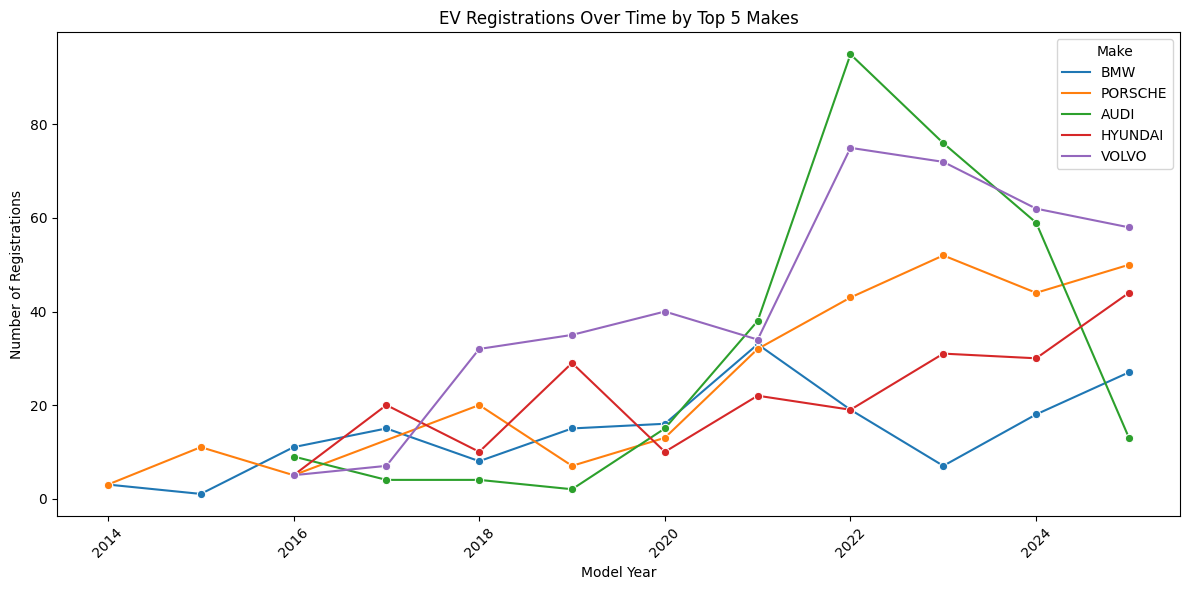

In [17]:
#EV Registrations Over Time by Top 5 Makes
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_data, x='Model Year', y='Registrations', hue='Make', marker='o')
plt.title('EV Registrations Over Time by Top 5 Makes')
plt.ylabel('Number of Registrations')
plt.xlabel('Model Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
#calculate the demand (registration count) for each vehicle model 
model_demand = df.groupby(['Make', 'Model']).size().reset_index(name='Count')
model_demand 

,Make,Model,Count
0,ACURA,ZDX,1
1,ALFA ROMEO,TONALE,3
2,AUDI,A3,17
3,AUDI,A7 E,7
4,AUDI,A8 E,3
...,...,...,...
153,VOLVO,V60,21
154,VOLVO,XC40,19
155,VOLVO,XC60,117
156,VOLVO,XC90,105


In [19]:
#TreeMap of EV Registrations by Make and Model
fig = px.treemap(model_demand,
                 path=['Make', 'Model'],
                 values='Count',
                 title='TreeMap of EV Registrations by Make and Model')
fig.show()

In [20]:
#Find which new Make-Model combos are entering the market—likely to use newer tech and parts.
recent_models = df[df['Model Year'] >= 2022]
new_model_counts = recent_models.groupby(['Make', 'Model']).size().reset_index(name='Recent Registrations')
top_new_models = new_model_counts.sort_values(by='Recent Registrations', ascending=False)
new_model_counts

,Make,Model,Recent Registrations
0,ACURA,ZDX,1
1,ALFA ROMEO,TONALE,3
2,AUDI,E-TRON,46
3,AUDI,E-TRON GT,45
4,AUDI,E-TRON SPORTBACK,21
...,...,...,...
113,VOLVO,S90,3
114,VOLVO,V60,15
115,VOLVO,XC40,18
116,VOLVO,XC60,60


In [21]:
top_new_models

,Make,Model,Recent Registrations
92,PORSCHE,TAYCAN,88
112,VOLVO,S60,70
116,VOLVO,XC60,60
89,PORSCHE,CAYENNE,59
27,CADILLAC,LYRIQ,57
...,...,...,...
82,MERCEDES-BENZ,SL-CLASS,1
14,BENTLEY,FLYING SPUR,1
30,CHEVROLET,BRIGHTDROP 400,1
32,CHEVROLET,SILVERADO EV,1


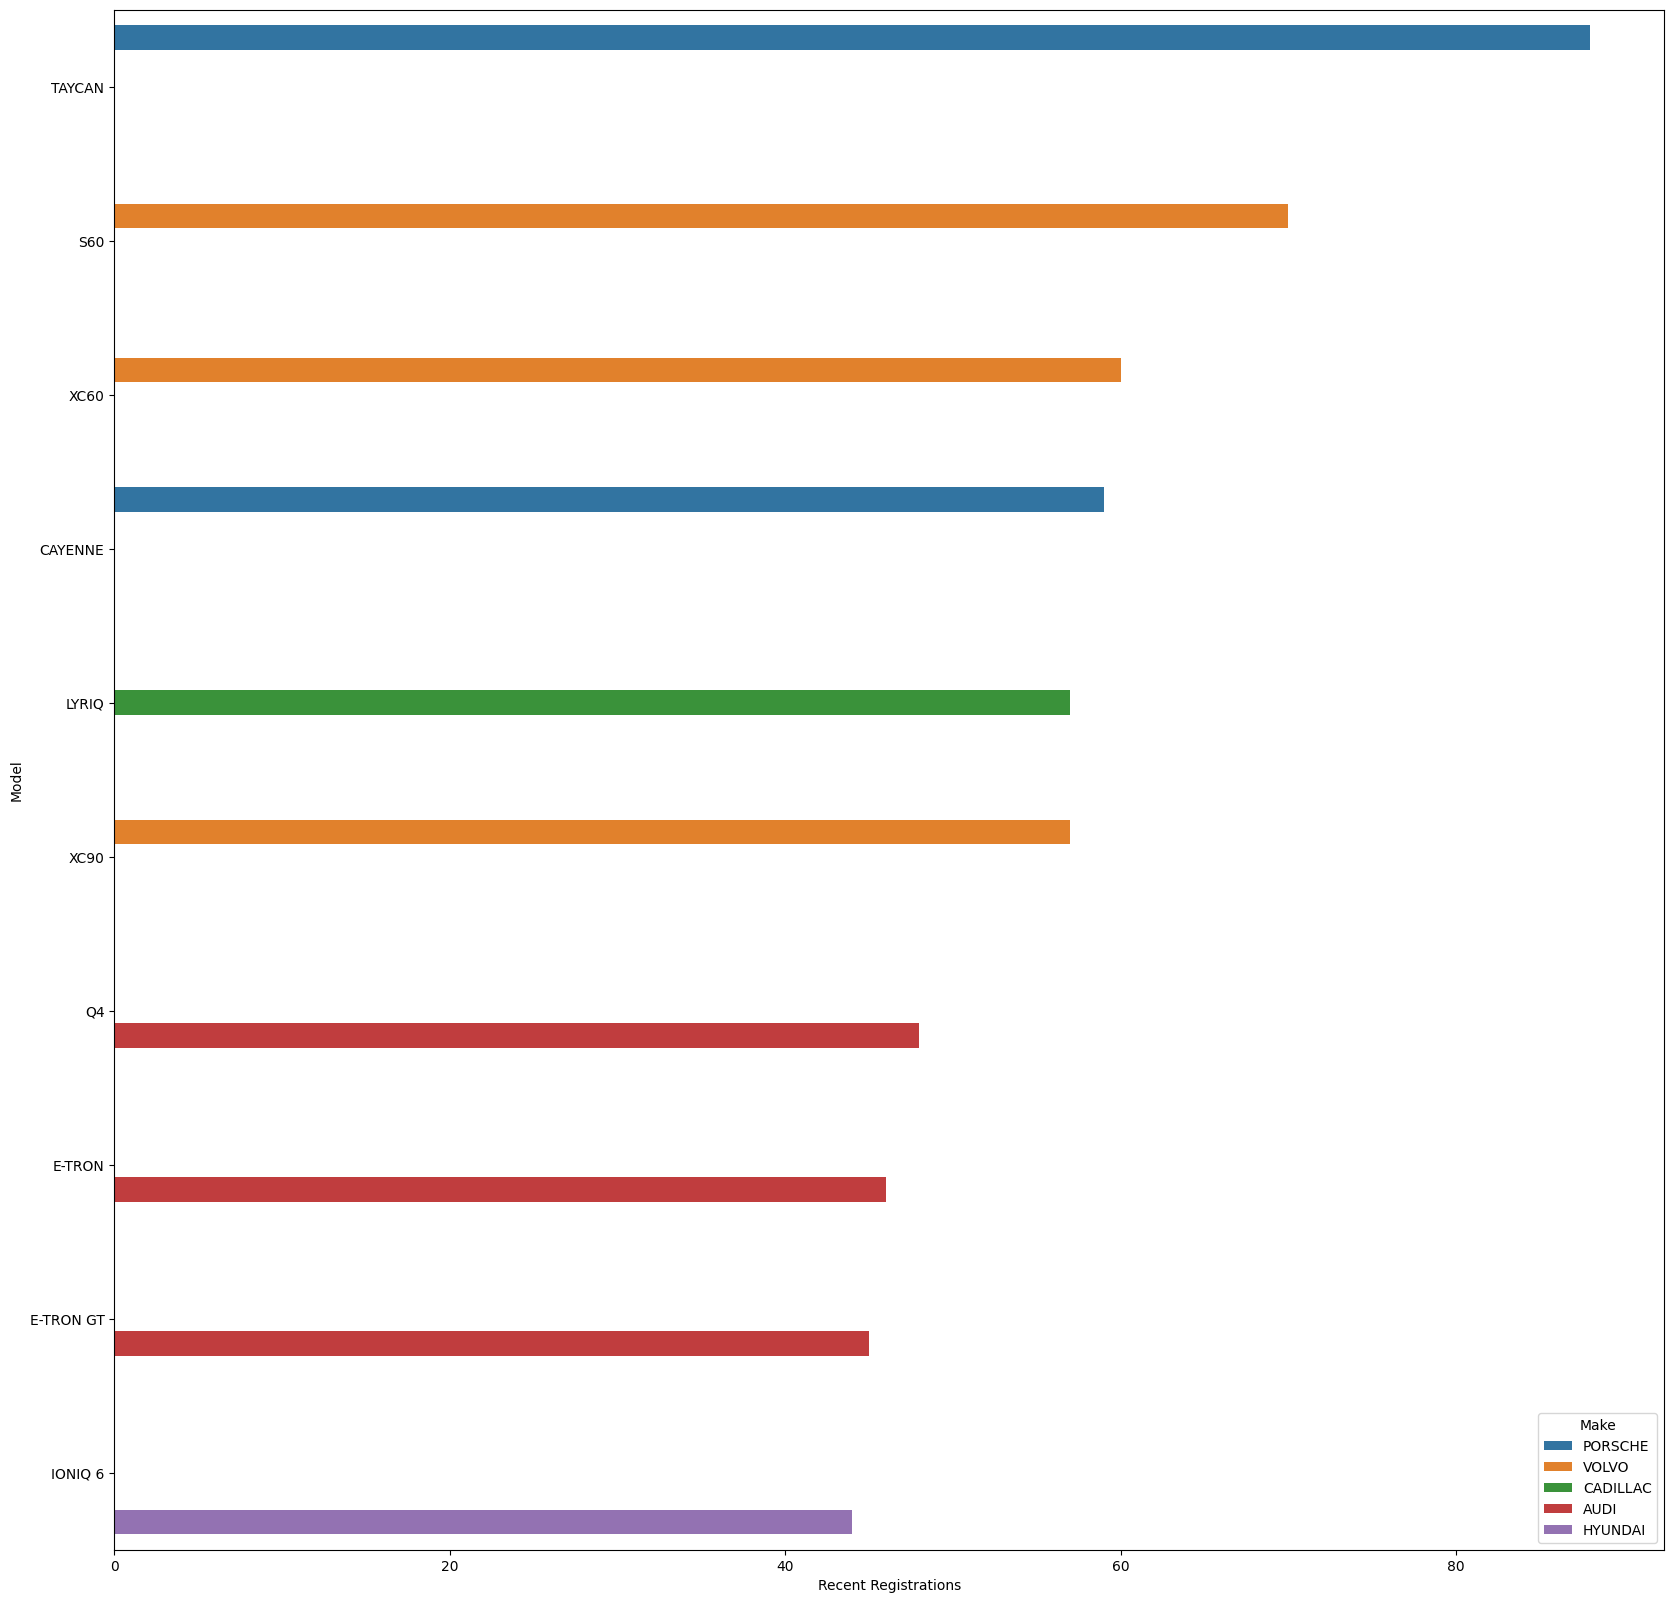

In [22]:
#top_10_Recent_Registrations
top_10_Recent_Registrations = top_new_models.head(10) #creating top 10 otherwise list will be long 
plt.figure(figsize=(20, 20))
sns.barplot(x='Recent Registrations', y='Model',hue = 'Make', data=top_10_Recent_Registrations)
plt.show()

In [23]:
#Use Electric Range as a proxy for battery/motor innovation.
avg_range_by_year = df.groupby('Model Year')['Electric Range'].mean().reset_index()
avg_range_by_year

,Model Year,Electric Range
0,2000,58.000000
1,2002,95.000000
2,2003,95.000000
3,2008,183.333333
4,2010,203.571429
5,2011,166.416667
6,2012,98.425000
7,2013,122.714286
8,2014,47.000000
9,2015,113.888889


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='Model Year', ylabel='Electric Range'>

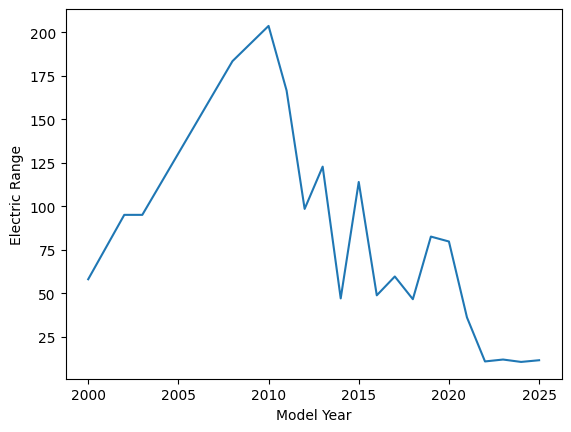

In [24]:
sns.lineplot(data=avg_range_by_year, x='Model Year', y='Electric Range')

In [25]:
#Forecast Demand for Emerging Component Categories-- Identify the brands and EV types driving component innovation.
emerging_brands = df[df['Model Year'] >= 2022].groupby(['Make', 'Electric Vehicle Type']).size().reset_index(name='Count')
emerging_brands

,Make,Electric Vehicle Type,Count
0,ACURA,Battery Electric Vehicle (BEV),1
1,ALFA ROMEO,Plug-in Hybrid Electric Vehicle (PHEV),3
2,AUDI,Battery Electric Vehicle (BEV),212
3,AUDI,Plug-in Hybrid Electric Vehicle (PHEV),31
4,BENTLEY,Plug-in Hybrid Electric Vehicle (PHEV),3
5,BMW,Battery Electric Vehicle (BEV),31
6,BMW,Plug-in Hybrid Electric Vehicle (PHEV),40
7,BRIGHTDROP,Battery Electric Vehicle (BEV),5
8,CADILLAC,Battery Electric Vehicle (BEV),62
9,CHEVROLET,Battery Electric Vehicle (BEV),55


In [26]:
#Combine Tech Trend + Model Popularity-- 
#Spot models that are both New High volume Long range This “tech trifecta” =  likely to need specialized parts early and often.
combo = df[df['Model Year'] >= 2022][['Make', 'Model', 'Electric Range']]
combo_grouped = combo.groupby(['Make', 'Model']).agg({'Electric Range': 'mean', 'Model': 'count'}).rename(columns={'Model': 'Registrations'}).reset_index()
combo_sorted = combo_grouped.sort_values(by='Registrations', ascending=False)
combo

,Make,Model,Electric Range
111,AUDI,E-TRON,0.0
481,RIVIAN,R1S,0.0
518,JAGUAR,I-PACE,0.0
602,HYUNDAI,KONA ELECTRIC,0.0
725,PORSCHE,MACAN,288.0
...,...,...,...
235289,CADILLAC,LYRIQ,0.0
235427,VOLVO,XC60,35.0
235511,FORD,MUSTANG MACH-E,0.0
235527,AUDI,E-TRON GT,0.0


In [27]:
combo_grouped

,Make,Model,Electric Range,Registrations
0,ACURA,ZDX,0.000000,1
1,ALFA ROMEO,TONALE,33.000000,3
2,AUDI,E-TRON,0.000000,46
3,AUDI,E-TRON GT,0.000000,45
4,AUDI,E-TRON SPORTBACK,0.000000,21
...,...,...,...,...
113,VOLVO,S90,38.000000,3
114,VOLVO,V60,38.466667,15
115,VOLVO,XC40,0.000000,18
116,VOLVO,XC60,33.250000,60


In [28]:
combo_sorted

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in less

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in greater



,Make,Model,Electric Range,Registrations
92,PORSCHE,TAYCAN,0.000000,88
112,VOLVO,S60,38.285714,70
116,VOLVO,XC60,33.250000,60
89,PORSCHE,CAYENNE,32.166667,59
27,CADILLAC,LYRIQ,0.000000,57
...,...,...,...,...
82,MERCEDES-BENZ,SL-CLASS,NaN,1
14,BENTLEY,FLYING SPUR,45.000000,1
30,CHEVROLET,BRIGHTDROP 400,0.000000,1
32,CHEVROLET,SILVERADO EV,0.000000,1


In [29]:
#Brand and Model Segmentation for Targeted Marketing
#Identify which EV brands and models are most registered in each state, 
# so the logistics/marketing team can prioritize spare part inventory and marketing campaigns regionally.
state_model_counts = df.groupby(['State', 'Make', 'Model']).size().reset_index(name='Registrations')
state_model_counts

,State,Make,Model,Registrations
0,CA,VOLVO,V60,1
1,CO,VOLVO,XC60,1
2,IL,AUDI,Q8,1
3,IL,VOLKSWAGEN,ID.4,1
4,NE,AUDI,E-TRON,1
...,...,...,...,...
158,WA,VOLVO,V60,20
159,WA,VOLVO,XC40,19
160,WA,VOLVO,XC60,116
161,WA,VOLVO,XC90,105


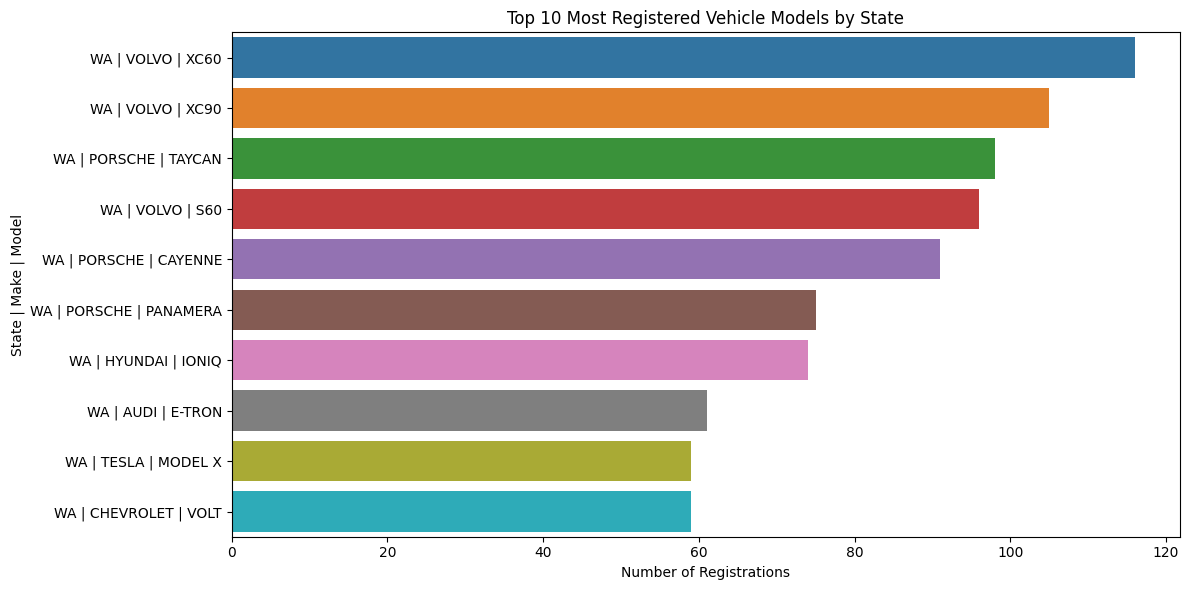

In [30]:
#Top 10 Most Registered Vehicle Models by State
top10 = state_model_counts.sort_values('Registrations', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(data=top10, x='Registrations', y=top10['State'] + ' | ' + top10['Make'] + ' | ' + top10['Model'])
plt.title('Top 10 Most Registered Vehicle Models by State')
plt.xlabel('Number of Registrations')
plt.ylabel('State | Make | Model')
plt.tight_layout()
plt.show()

In [31]:
#  For each state, find the top registered Make + Model
# Sort and get top registered vehicle in each state
top_models_by_state = state_model_counts.sort_values(['State', 'Registrations'], ascending=[True, False])

# Get top vehicle per state (first row per state after sorting)
top_vehicle_per_state = top_models_by_state.groupby('State').head(1).reset_index(drop=True)
top_models_by_state

,State,Make,Model,Registrations
0,CA,VOLVO,V60,1
1,CO,VOLVO,XC60,1
2,IL,AUDI,Q8,1
3,IL,VOLKSWAGEN,ID.4,1
4,NE,AUDI,E-TRON,1
...,...,...,...,...
46,WA,CHEVROLET,BRIGHTDROP 400,1
48,WA,CHEVROLET,SILVERADO EV,1
115,WA,MERCEDES-BENZ,SL-CLASS,1
124,WA,PORSCHE,918,1


In [32]:
top_vehicle_per_state

,State,Make,Model,Registrations
0,CA,VOLVO,V60,1
1,CO,VOLVO,XC60,1
2,IL,AUDI,Q8,1
3,NE,AUDI,E-TRON,1
4,WA,VOLVO,XC60,116


In [33]:
#Understand how EV pricing varies by type (BEV, PHEV, etc.) to align offerings with customer affordability and value preferences.
price_data = df[['Make', 'Model', 'Electric Vehicle Type', 'Base MSRP']].dropna()
price_data

,Make,Model,Electric Vehicle Type,Base MSRP
111,AUDI,E-TRON,Battery Electric Vehicle (BEV),0.0
481,RIVIAN,R1S,Battery Electric Vehicle (BEV),0.0
518,JAGUAR,I-PACE,Battery Electric Vehicle (BEV),0.0
602,HYUNDAI,KONA ELECTRIC,Battery Electric Vehicle (BEV),0.0
620,AUDI,E-TRON,Battery Electric Vehicle (BEV),0.0
...,...,...,...,...
235511,FORD,MUSTANG MACH-E,Battery Electric Vehicle (BEV),0.0
235527,AUDI,E-TRON GT,Battery Electric Vehicle (BEV),0.0
235580,VOLVO,XC90,Plug-in Hybrid Electric Vehicle (PHEV),0.0
235662,AUDI,Q5 E,Plug-in Hybrid Electric Vehicle (PHEV),0.0


In [34]:
# We will group by EV type and calculate average price
msrp_by_type = price_data.groupby('Electric Vehicle Type')['Base MSRP'].agg(['mean', 'median', 'count']).reset_index()
msrp_by_type = msrp_by_type.sort_values(by='mean', ascending=False)
msrp_by_type

,Electric Vehicle Type,mean,median,count
1,Plug-in Hybrid Electric Vehicle (PHEV),6237.874355,0.0,1162
0,Battery Electric Vehicle (BEV),2589.600840,0.0,1428


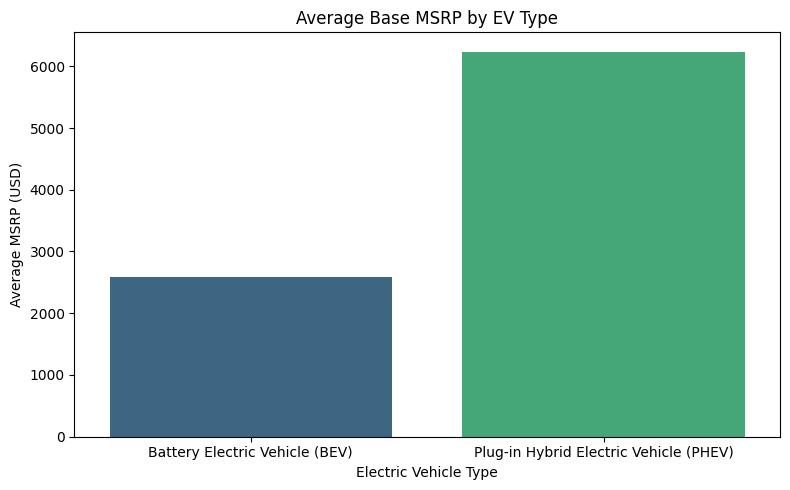

In [35]:
msrp_summary = df[['Electric Vehicle Type', 'Base MSRP']].dropna().groupby('Electric Vehicle Type')['Base MSRP'].mean().reset_index()

#   plot using the correct DataFrame
plt.figure(figsize=(8, 5))
sns.barplot(data=msrp_summary, x='Electric Vehicle Type', y='Base MSRP', palette='viridis')
plt.title('Average Base MSRP by EV Type')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Average MSRP (USD)')
plt.tight_layout()
plt.show()